In [ ]:
# see https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
# for more on installing packages for Jupyter Notebook

In [ ]:
# install packages: ibm-watson, OpenCV

# already installed in my Jupyter Notebook environment

In [28]:
# pip install ibm-watson - to access Watson Visual Recognition API
import sys
!{sys.executable} -m pip install ibm-watson

In [29]:
# pip install opencv-python -  a package for image processing
!{sys.executable} -m pip install opencv-python

In [44]:
import cv2 #opencv-python
import urllib.request

In [60]:
from matplotlib import pyplot as plt
from pylab import rcParams

In [ ]:
# from IBM cloud, copy your credentials - API key, URL endpoints for IBM Watson Visual Recognition, and paste below

In [45]:
# my_apikey = 'Your_API_Key'
my_apikey = '***' # removing from public file

# url_endpoint = 'copy_from_cloud'
url_endpoint = 'https://api.eu-de.visual-recognition.watson.cloud.ibm.com/instances/66c8c93c-de38-4508-8dc4-25310d43ac99'

In [ ]:
# create IBM Watson Visual Recognition instance

In [46]:
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator(my_apikey)

#api needs version date
visrec = VisualRecognitionV3('2018-03-19', authenticator = authenticator)

visrec.set_service_url(url_endpoint)

In [10]:
# download training images

In [47]:
# Downloading Beagle dataset
urllib.request.urlretrieve("http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/Beagle.zip", 
                           "beagle.zip")

# Downloading Husky dataset
urllib.request.urlretrieve("http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/Husky.zip", 
                           "husky.zip")

# Downloading Golden Retriever dataset
urllib.request.urlretrieve("http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/GoldenRetriever.zip", 
                           "goldenretriever.zip") 

#note that we should remove any hyphens from the zip file name

('goldenretriever.zip', <http.client.HTTPMessage at 0x19da8750e20>)

In [58]:
# Downloads an image from a URL, and displays it in the notebook
def plt_image(image_url, size = (10,8)):

    # downloads file as "image.jpgplt_image(image_url"
    urllib.request.urlretrieve(image_url, "image.jpg") 
    
    image = cv2.imread("image.jpg")
    
    # If image is in color, then correct color coding from BGR to RGB
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    rcParams['figure.figsize'] = size[0], size[1] #set image display size

    plt.axis("off")
    plt.imshow(image, cmap="Greys_r")
    plt.show()

In [48]:
import json

with open('beagle.zip', 'rb') as beagle, \
     open('goldenretriever.zip', 'rb') as gretriever, \
     open('husky.zip', 'rb') as husky:
        response = visrec.create_classifier(name = "dogbreedclassifier",
                                            positive_examples = {'beagle': beagle, \
                                                                 'goldenretriever': gretriever, \
                                                                 'husky': husky})
print(json.dumps(response.get_result(), indent=2))

{
  "classifier_id": "dogbreedclassifier_604917167",
  "name": "dogbreedclassifier",
  "status": "training",
  "owner": "66c8c93c-de38-4508-8dc4-25310d43ac99",
  "created": "2020-09-09T10:50:02.026Z",
  "updated": "2020-09-09T10:50:02.026Z",
  "classes": [
    {
      "class": "husky"
    },
    {
      "class": "goldenretriever"
    },
    {
      "class": "beagle"
    }
  ],
  "rscnn_enabled": false,
  "core_ml_enabled": true
}


In [49]:
#lets grab the classifier id
classifier_id = response.get_result()["classifier_id"]
classifier_id

'dogbreedclassifier_604917167'

In [ ]:
# confirm model has stopped running - lots of images takes time

In [54]:
Status = visrec.get_classifier(classifier_id = classifier_id, verbose = True).get_result()['status']
if Status=='training': 
    print ("Please, Wait to complete training.......")
else:
    print("Good to go ")

Good to go 


In [22]:
# list all custom classifiers

In [51]:
visrec.list_classifiers(verbose = True).get_result()

{'classifiers': [{'classifier_id': 'dogbreedclassifier_604917167',
   'name': 'dogbreedclassifier',
   'status': 'training',
   'owner': '66c8c93c-de38-4508-8dc4-25310d43ac99',
   'created': '2020-09-09T10:50:02.026Z',
   'updated': '2020-09-09T10:50:02.026Z',
   'classes': [{'class': 'husky'},
    {'class': 'goldenretriever'},
    {'class': 'beagle'}],
   'rscnn_enabled': False,
   'core_ml_enabled': True}]}

In [55]:
# test classifier with new image

In [56]:
from pandas.io.json import json_normalize

def getdf_visrec(url, classifier_ids, apikey = my_apikey):
    
    json_result = visrec.classify(url = url, threshold = '0.6', classifier_ids = classifier_id).get_result()
    
    json_classes = json_result['images'][0]['classifiers'][0]['classes']
    
    df = json_normalize(json_classes).sort_values('score', ascending = False).reset_index(drop=True)
    
    return df

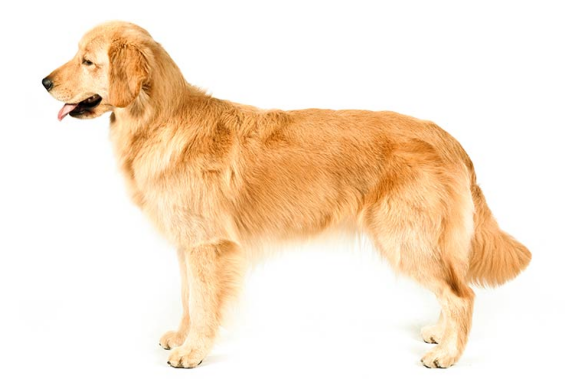

<ipython-input-56-1cd8ca1ff816>:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(json_classes).sort_values('score', ascending = False).reset_index(drop=True)


,class,score
0,goldenretriever,0.908


In [61]:
image_url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/GoldenRetriever1_stacked.jpg'

plt_image(image_url)
getdf_visrec(url = image_url, classifier_ids=classifier_id)

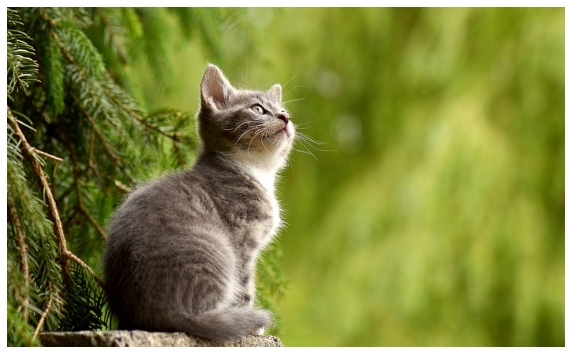

<ipython-input-56-1cd8ca1ff816>:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df = json_normalize(json_classes).sort_values('score', ascending = False).reset_index(drop=True)


,class,score
0,husky,0.821


In [63]:
image_url = 'http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/CV0101/Dataset/cat-2083492_960_720.jpg'

plt_image(image_url)
getdf_visrec(url = image_url, classifier_ids = classifier_id)           

In [37]:
# delete classifiers

In [64]:
classifiers = visrec.list_classifiers(verbose=True).get_result()['classifiers']
print(json.dumps(classifiers, indent=2))

[
  {
    "classifier_id": "dogbreedclassifier_604917167",
    "name": "dogbreedclassifier",
    "status": "ready",
    "owner": "66c8c93c-de38-4508-8dc4-25310d43ac99",
    "created": "2020-09-09T10:50:02.026Z",
    "updated": "2020-09-09T10:50:02.026Z",
    "classes": [
      {
        "class": "husky"
      },
      {
        "class": "goldenretriever"
      },
      {
        "class": "beagle"
      }
    ],
    "rscnn_enabled": false,
    "core_ml_enabled": true
  }
]


In [65]:
mycid = 'dogbreedclassifier_604917167' #the classifier id you want to delete
visrec.delete_classifier(classifier_id = mycid)